In [9]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# import corrwith
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [10]:
RANDOM_STATE = 42

In [11]:
def custom_split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)
    return X_train, X_val, X_test, y_train, y_val, y_test

def custom_encode(X):
    for col in X.columns:
        if X[col].dtype == 'object':
            X = pd.get_dummies(X, columns=[col], drop_first=True)

    return X

def custom_scale(X):
    for col in X.columns.values:
        if len(X[col].unique()) > 2:
            scalar = StandardScaler()
            X[col] = scalar.fit_transform(X[col].values.reshape(-1, 1))

    return X

def custom_fillna(X):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].fillna(X[col].mode()[0])
        else:
            X[col] = X[col].fillna(X[col].mean())

    return X

def custom_df_to_X_y(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y


In [12]:
# load the dataset
df= pd.read_csv('online/B1.csv')
# print(df)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = custom_fillna(X)
X = custom_encode(X)
X = custom_scale(X)
y = y.fillna(y.mode()[0])
print(X.shape)
# print how many 1 and 0 in y
print(y.value_counts())

(3000, 2)
1    1500
0    1500
Name: y, dtype: int64


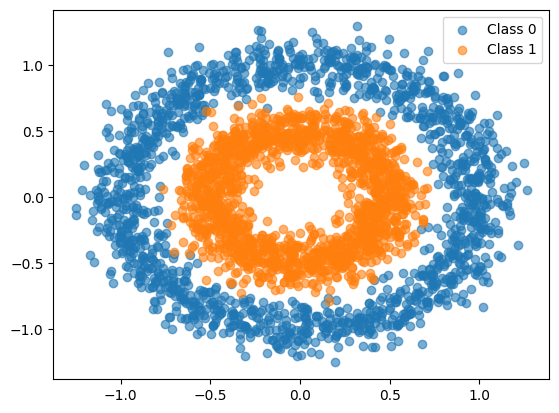

In [15]:
# Plot the dataset (optional for visualization)
X_val = df[['X1', 'X2']].values
y_val = df['y'].values
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.show()